In [79]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
import seaborn as sns
import matplotlib.pyplot as plt

In [80]:
# Load the dataset
data = pd.read_csv('MBA.csv')

# Display the first few rows of the dataset
print(data.head())

   application_id  gender  international   gpa       major      race   gmat  \
0               1  Female          False  3.30    Business     Asian  620.0   
1               2    Male          False  3.28  Humanities     Black  680.0   
2               3  Female           True  3.30    Business       NaN  710.0   
3               4    Male          False  3.47        STEM     Black  690.0   
4               5    Male          False  3.35        STEM  Hispanic  590.0   

   work_exp          work_industry admission  
0       3.0     Financial Services     Admit  
1       5.0  Investment Management       NaN  
2       5.0             Technology     Admit  
3       6.0             Technology       NaN  
4       5.0             Consulting       NaN  


In [81]:
# Check for missing values
print(data.isnull().sum())

application_id       0
gender               0
international        0
gpa                  0
major                0
race              1842
gmat                 0
work_exp             0
work_industry        0
admission         5194
dtype: int64


In [82]:
# Handling missing values

# Fill missing values in the 'race' column with a new category 'Unknown'
data['race'] = data['race'].fillna('Unknown')

# Fill missing values in the 'admission' column with 'Not Accepted'
data['admission'] = data['admission'].fillna('Not Accepted')

# Check again for missing values after handling
print(data.isnull().sum())

application_id    0
gender            0
international     0
gpa               0
major             0
race              0
gmat              0
work_exp          0
work_industry     0
admission         0
dtype: int64


In [83]:
# Data preprocessing
# Encoding categorical variables
label_encoder = LabelEncoder()
data['gender'] = label_encoder.fit_transform(data['gender'].fillna('Unknown'))
data['international'] = data['international'].apply(lambda x: 1 if x == 'TRUE' else 0)
data['major'] = label_encoder.fit_transform(data['major'].fillna('Unknown'))
data['race'] = label_encoder.fit_transform(data['race'].fillna('Unknown'))
data['work_industry'] = label_encoder.fit_transform(data['work_industry'].fillna('Unknown'))
data['admission'] = label_encoder.fit_transform(data['admission'].fillna('Deny'))  # Encode the admission status

In [84]:
# Features and labels
X = data.drop(['application_id', 'admission'], axis=1)  # Dropping irrelevant features
y = data['admission']

In [85]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [86]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [87]:
# Train a Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [88]:
# Make predictions using the decision tree model on the test data
y_pred_dt = dt_model.predict(X_test)

In [89]:
# Evaluate Decision Tree
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {dt_accuracy:.2f}")
dt_classification_report = classification_report(y_test, y_pred_dt)
print("Decision Tree Classification Report:\n", dt_classification_report)

Decision Tree Accuracy: 0.77
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.35      0.32      0.33       299
           1       0.86      0.88      0.87      1525
           2       0.00      0.00      0.00        35

    accuracy                           0.77      1859
   macro avg       0.40      0.40      0.40      1859
weighted avg       0.76      0.77      0.77      1859



Decision Tree Confusion Matrix:
 [[  95  199    5]
 [ 167 1339   19]
 [  12   23    0]]


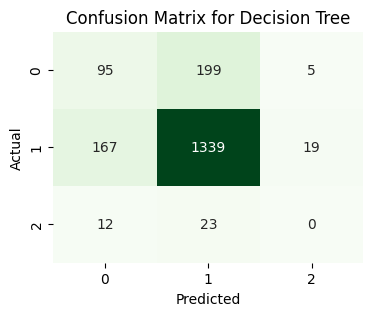

In [90]:
# Generate confusion matrix for Decision Tree
dt_confusion_matrix = confusion_matrix(y_test, y_pred_dt)
print("Decision Tree Confusion Matrix:\n", dt_confusion_matrix)

# Plot Confusion Matrix for Decision Tree
plt.figure(figsize=(4, 3))
sns.heatmap(dt_confusion_matrix, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title("Confusion Matrix for Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [91]:
# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [92]:
# Make predictions using the random forest model on the test data
y_pred_rf = rf_model.predict(X_test)

In [93]:
# Evaluate Random Forest
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")
rf_classification_report = classification_report(y_test, y_pred_rf)
print("Random Forest Classification Report:\n", rf_classification_report)

Random Forest Accuracy: 0.81
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.18      0.25       299
           1       0.84      0.95      0.89      1525
           2       0.00      0.00      0.00        35

    accuracy                           0.81      1859
   macro avg       0.42      0.38      0.38      1859
weighted avg       0.76      0.81      0.77      1859



c:\Users\LENOVO\Documents\aus\CDUAI_ASS3\.env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LENOVO\Documents\aus\CDUAI_ASS3\.env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LENOVO\Documents\aus\CDUAI_ASS3\.env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

Random Forest Confusion Matrix:
 [[  54  245    0]
 [  73 1452    0]
 [   1   34    0]]


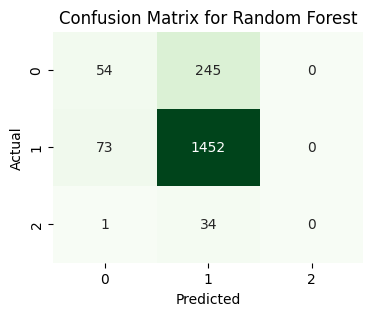

In [94]:
# Generate confusion matrix for Random Forest
rf_confusion_matrix = confusion_matrix(y_test, y_pred_rf)
print("Random Forest Confusion Matrix:\n", rf_confusion_matrix)

# Plot Confusion Matrix for Random Forest
plt.figure(figsize=(4, 3))
sns.heatmap(rf_confusion_matrix, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title("Confusion Matrix for Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [95]:
# Train a Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [96]:
# Make predictions using the Naive Bayes model on the test data
y_pred_nb = nb_model.predict(X_test)

In [97]:
# Evaluate Naive Bayes
nb_accuracy = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {nb_accuracy:.2f}")
nb_classification_report = classification_report(y_test, y_pred_nb)
print("Naive Bayes Classification Report:\n", nb_classification_report)

Naive Bayes Accuracy: 0.82
Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.28      0.35       299
           1       0.85      0.94      0.90      1525
           2       0.00      0.00      0.00        35

    accuracy                           0.82      1859
   macro avg       0.44      0.41      0.42      1859
weighted avg       0.78      0.82      0.79      1859



c:\Users\LENOVO\Documents\aus\CDUAI_ASS3\.env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LENOVO\Documents\aus\CDUAI_ASS3\.env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LENOVO\Documents\aus\CDUAI_ASS3\.env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

Naive Bayes Confusion Matrix:
 [[  83  216    0]
 [  86 1439    0]
 [   6   29    0]]


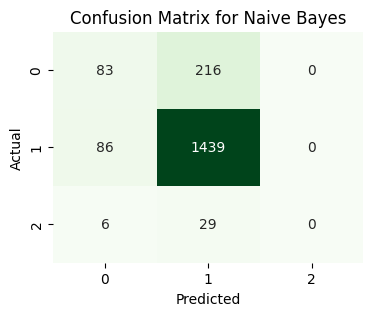

In [98]:
# Generate confusion matrix for Naive Bayes
nb_confusion_matrix = confusion_matrix(y_test, y_pred_nb)
print("Naive Bayes Confusion Matrix:\n", nb_confusion_matrix)

# Plot Confusion Matrix for Naive Bayes
plt.figure(figsize=(4, 3))
sns.heatmap(nb_confusion_matrix, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title("Confusion Matrix for Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [99]:
# Build the ANN model
ann_model = Sequential()
ann_model.add(Input(shape=(X_train.shape[1],)))  # Input layer
ann_model.add(Dense(128, activation='relu'))
ann_model.add(Dropout(0.3))  # Dropout for regularization
ann_model.add(Dense(64, activation='relu'))
ann_model.add(Dropout(0.3))
ann_model.add(Dense(32, activation='relu'))
ann_model.add(Dense(3, activation='softmax'))  # 3 output classes for Admit, Waitlist, and Deny

In [118]:
# Compile the ANN model
ann_model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Train the ANN model
history = ann_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8596 - loss: 0.3325 - val_accuracy: 0.8219 - val_loss: 0.4259
Epoch 2/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8387 - loss: 0.3525 - val_accuracy: 0.8219 - val_loss: 0.4304
Epoch 3/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8578 - loss: 0.3250 - val_accuracy: 0.8187 - val_loss: 0.4291
Epoch 4/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8487 - loss: 0.3395 - val_accuracy: 0.8193 - val_loss: 0.4316
Epoch 5/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8509 - loss: 0.3494 - val_accuracy: 0.8155 - val_loss: 0.4273
Epoch 6/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8518 - loss: 0.3408 - val_accuracy: 0.8236 - val_loss: 0.4315
Epoch 7/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8536 - loss: 0.3280 - val_accuracy: 0.8214 - val_loss: 0.4340
Epoch 8/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8520 - loss: 0.3386 - val_accuracy: 0.

In [102]:
# Make predictions using the ANN model on the test data
y_pred_ann = np.argmax(ann_model.predict(X_test), axis=1)

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [103]:
# Evaluate ANN
ann_accuracy = accuracy_score(y_test, y_pred_ann)
print(f"ANN Accuracy: {ann_accuracy:.2f}")
ann_classification_report = classification_report(y_test, y_pred_ann)
print("ANN Classification Report:\n", ann_classification_report)

ANN Accuracy: 0.83
ANN Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.09      0.15       299
           1       0.83      0.99      0.90      1525
           2       0.00      0.00      0.00        35

    accuracy                           0.83      1859
   macro avg       0.47      0.36      0.35      1859
weighted avg       0.78      0.83      0.77      1859



c:\Users\LENOVO\Documents\aus\CDUAI_ASS3\.env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LENOVO\Documents\aus\CDUAI_ASS3\.env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LENOVO\Documents\aus\CDUAI_ASS3\.env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

ANN Confusion Matrix:
 [[  26  273    0]
 [  17 1508    0]
 [   1   34    0]]


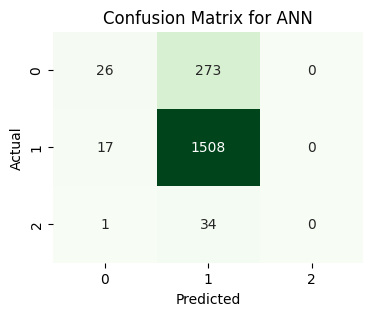

In [104]:
# Generate confusion matrix for ANN
ann_confusion_matrix = confusion_matrix(y_test, y_pred_ann)
print("ANN Confusion Matrix:\n", ann_confusion_matrix)

# Plot Confusion Matrix for ANN
plt.figure(figsize=(4, 3))
sns.heatmap(ann_confusion_matrix, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title("Confusion Matrix for ANN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [105]:
# Function to compare evaluation metrics visually
def plot_comparison(models, accuracies):
    # Plot comparison of accuracies
    plt.figure(figsize=(10, 6))
    sns.barplot(x=models, y=accuracies)
    plt.title("Comparison of Model Accuracies")
    plt.ylabel("Accuracy")
    plt.show()

In [106]:
# Compare model accuracies
models = ['Decision Tree', 'Random Forest', 'Naive Bayes', 'ANN']
accuracies = [dt_accuracy, rf_accuracy, nb_accuracy, ann_accuracy]

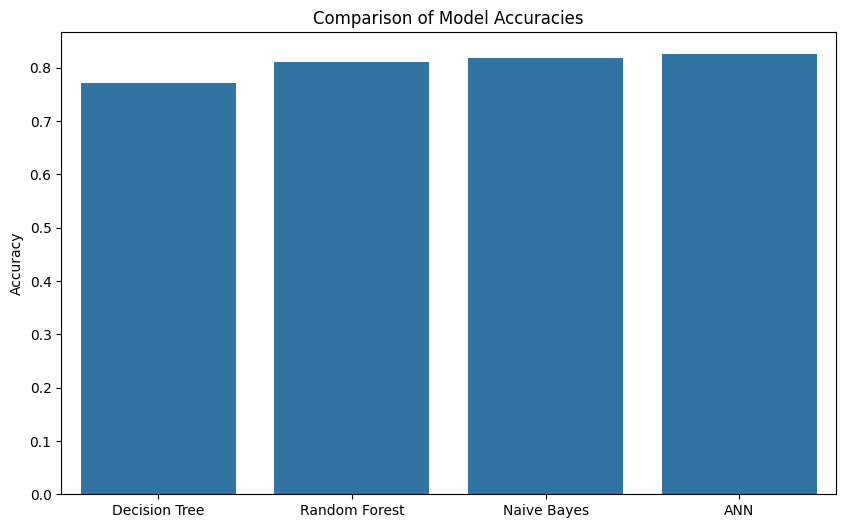

In [107]:
plot_comparison(models, accuracies)

In [108]:
# Store metrics for each model
metrics_comparison = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": []
}

In [109]:
# Random Forest Metrics
metrics_comparison["Model"].append("Random Forest")
metrics_comparison["Accuracy"].append(accuracy_score(y_test, y_pred_rf))
metrics_comparison["Precision"].append(classification_report(y_test, y_pred_rf, output_dict=True)['weighted avg']['precision'])
metrics_comparison["Recall"].append(classification_report(y_test, y_pred_rf, output_dict=True)['weighted avg']['recall'])
metrics_comparison["F1-Score"].append(classification_report(y_test, y_pred_rf, output_dict=True)['weighted avg']['f1-score'])


c:\Users\LENOVO\Documents\aus\CDUAI_ASS3\.env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LENOVO\Documents\aus\CDUAI_ASS3\.env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LENOVO\Documents\aus\CDUAI_ASS3\.env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

In [110]:
# Decision Tree Metrics
metrics_comparison["Model"].append("Decision Tree")
metrics_comparison["Accuracy"].append(accuracy_score(y_test, y_pred_dt))
metrics_comparison["Precision"].append(classification_report(y_test, y_pred_dt, output_dict=True)['weighted avg']['precision'])
metrics_comparison["Recall"].append(classification_report(y_test, y_pred_dt, output_dict=True)['weighted avg']['recall'])
metrics_comparison["F1-Score"].append(classification_report(y_test, y_pred_dt, output_dict=True)['weighted avg']['f1-score'])

In [111]:
# Naive Bayes Metrics
metrics_comparison["Model"].append("Naive Bayes")
metrics_comparison["Accuracy"].append(accuracy_score(y_test, y_pred_nb))
metrics_comparison["Precision"].append(classification_report(y_test, y_pred_nb, output_dict=True)['weighted avg']['precision'])
metrics_comparison["Recall"].append(classification_report(y_test, y_pred_nb, output_dict=True)['weighted avg']['recall'])
metrics_comparison["F1-Score"].append(classification_report(y_test, y_pred_nb, output_dict=True)['weighted avg']['f1-score'])


c:\Users\LENOVO\Documents\aus\CDUAI_ASS3\.env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LENOVO\Documents\aus\CDUAI_ASS3\.env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LENOVO\Documents\aus\CDUAI_ASS3\.env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

In [112]:
# ANN Metrics
metrics_comparison["Model"].append("ANN")
metrics_comparison["Accuracy"].append(accuracy_score(y_test, y_pred_ann))
metrics_comparison["Precision"].append(classification_report(y_test, y_pred_ann, output_dict=True)['weighted avg']['precision'])
metrics_comparison["Recall"].append(classification_report(y_test, y_pred_ann, output_dict=True)['weighted avg']['recall'])
metrics_comparison["F1-Score"].append(classification_report(y_test, y_pred_ann, output_dict=True)['weighted avg']['f1-score'])

c:\Users\LENOVO\Documents\aus\CDUAI_ASS3\.env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LENOVO\Documents\aus\CDUAI_ASS3\.env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LENOVO\Documents\aus\CDUAI_ASS3\.env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

In [113]:
# Convert metrics comparison to DataFrame
metrics_df = pd.DataFrame(metrics_comparison)
# Display the metrics comparison DataFrame
print(metrics_df)

           Model  Accuracy  Precision    Recall  F1-Score
0  Random Forest  0.810113   0.755967  0.810113  0.772329
1  Decision Tree  0.771382   0.759434  0.771382  0.765210
2    Naive Bayes  0.818720   0.777269  0.818720  0.792046
3            ANN  0.825175   0.776619  0.825175  0.765140


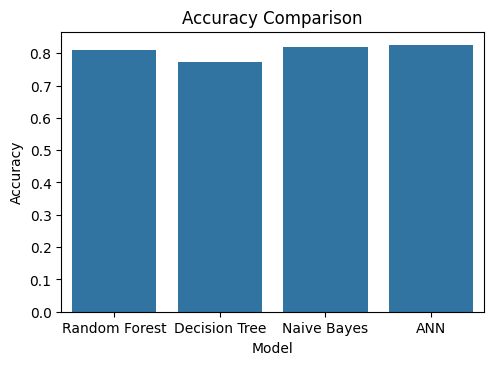

In [119]:
# Plotting the metrics for comparison
plt.figure(figsize=(12, 8))
# Plot accuracy
plt.subplot(2, 2, 1)
sns.barplot(x="Model", y="Accuracy", data=metrics_df)
plt.title("Accuracy Comparison")
plt.show()

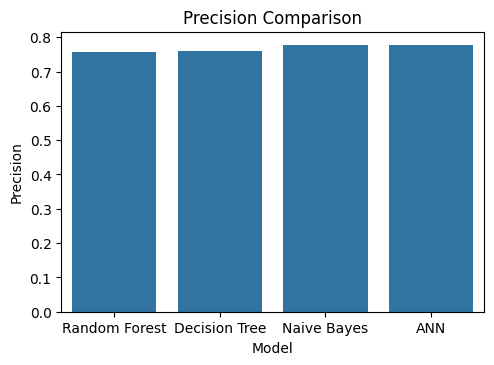

In [120]:

# Plot precision
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 2)
sns.barplot(x="Model", y="Precision", data=metrics_df)
plt.title("Precision Comparison")
plt.show()


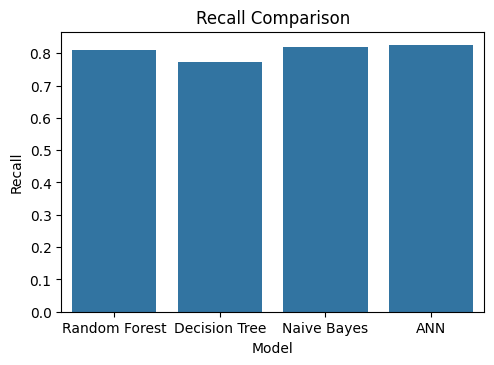

In [121]:

# Plot recall
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 3)
sns.barplot(x="Model", y="Recall", data=metrics_df)
plt.title("Recall Comparison")
plt.show()

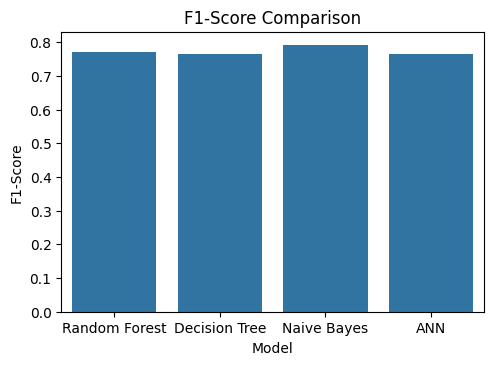

In [122]:
# Plot F1-score
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 4)
sns.barplot(x="Model", y="F1-Score", data=metrics_df)
plt.title("F1-Score Comparison")
plt.show()